In [1]:
import xarray as xr
import numpy as np
import cftime
import nc_time_axis
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import ticker, cm
from cftime import datetime 
import matplotlib.colors as colors
import math
import random
import matplotlib.cm as mcm
jet = mcm.get_cmap('jet')
import cartopy.crs as ccrs # CRS stands for "Coordinate reference systems" for map projection
from cartopy.crs import PlateCarree
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from dateutil import tz
import pytz
%matplotlib inline 

filename="Nc_Files/Jianfei_WACCMX_files/waccmx_Fe_Fep_Feb.nc"
#filename="Nc_Files/Jianfei_WACCMX_files/waccmx_Na_Nap_Feb.nc"
#filename="Nc_Files/Jianfei_WACCMX_files/waccmx_Mg_Mgp_Feb.nc"

filename2="Nc_Files/Jianfei_WACCMX_files/waccmx_T_Z3_e_Feb.nc"
#filename3="Nc_Files/Jianfei_WACCMX_files/waccmx_winds_Feb.nc"

M = filename[-10:]
Metal=M[0:2]
#print(Metal)

ds = xr.open_dataset(filename)
ds2 = xr.open_dataset(filename2)
#ds2
#ds

In [2]:
time = ds.variables['time']
times = xr.cftime_range(start="0001-02-01", periods=672, freq="1H", calendar="noleap")
times2 = ds["time"].dt.strftime("%Y%m%d %H:%M")
times3 = ds["time"].dt.strftime("%Y%m%d")

#times
#times2
#times3

In [3]:
lon = ds.variables['lon']
lat = ds.variables['lat']
lev = ds.variables['lev']

#M = ds.variables[str(Metal)]
#Mp = ds.variables[str(Metal)+'p']

dst = ds.transpose("lev", ...)
Mt = dst.variables[str(Metal)]
Mpt = dst.variables[str(Metal)+'p']

#Mt[:,1,1,1]
#lev
#dst
#geopH[-1,1,1,1]
#temp
#lat

In [ ]:
ds2t = ds2.transpose("lev", ...)
temp = ds2t.variables['T']
elect = ds2t.variables['e']

geopH = ds2t.variables['Z3'] / 1000 #m-> km
Zavg = geopH.mean(('time','lat', 'lon'))

Mtdens = ( Mt * 1e-6 * 100 * lev ) / (1.380503e-23 * temp)
Mptdens = ( Mpt * 1e-6 * 100 * lev ) / (1.380503e-23 * temp)
edens = ( elect * 1e-6 * 100 * lev ) / (1.380503e-23 * temp)

#Mtdens2 = Mtdens / 1000 # convert to 10^3 cm-3
#Mptdens2 = Mptdens / 1000 # convert to 10^3 cm-3

In [14]:
#-------------------Set up Mp density for plot 2-----------------
#-------------time slicing : averaging daily data at 10am--------
#----------------------avg lon, all levs-------------------------

times_10am = time[10:659:24] 
#start at 10am, step in 24h jumps to time[658] #array(cftime.DatetimeNoLeap(1, 2, 28, 10, 0, 0, 0, has_year_zero=True), dtype=object)

Mptdens_plot2 = Mptdens[:,10:659:24,:,:]   #lev: 126 time: 28 lat: 96 lon: 144
Mptdens_plot2 = Mptdens_plot2.mean(('time'))    #lev: 126 lat: 96 lon: 144
Mptdens_plot2 = Mptdens_plot2.mean(('lon')) #lev: 126 lat: 96


#times_10am
#Mptdens_plot2

In [14]:
#Sets up lev / alt axes

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

lowest_p = 1*10**-2
highest_p = 5*10**-6

low_ylim_idx = find_nearest(lev, lowest_p)
high_ylim_idx = find_nearest(lev, highest_p)

y_lims = [lev[low_ylim_idx], lev[high_ylim_idx]]

/tmp/ipykernel_1717962/85072072.py:8: UserWarning: Log scale: values of z <= 0 have been masked
  C = ax.contourf(lat, lev, Mptdens_plot2,
/tmp/ipykernel_1717962/85072072.py:24: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = fig.colorbar(C,ticks=ticks[::2],format='%.0e', pad=0.12) #,format='%.0e'


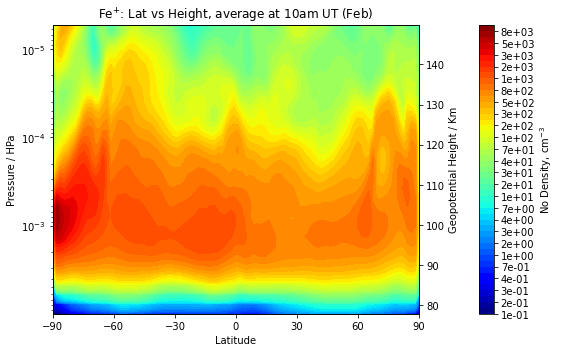

In [16]:
#------------------------Plot 2-----------------------------
#----------Lat vs Height, average at 10am UT (Feb)----------

#ticks = np.linspace(0, 8.0, num=17)
ticks = np.logspace(-1, 4)

fig, ax = plt.subplots(figsize=(8, 5))
C = ax.contourf(lat, lev, Mptdens_plot2, 
                levels=ticks, 
                locator=ticker.LogLocator(),
                cmap=jet)
 
ax.set_yscale('log')
ax.set_ylabel('Pressure / HPa')
ax.set_ylim(y_lims[0], y_lims[1]) 

ax.set_xlabel('Latitude')
ax.set_xticks(ticks=[-90, -60, -30, 0, 30, 60, 90])

ax2 = ax.twinx()
ax2.set_ylabel('Geopotential Height / Km')
ax2.set_ylim(Zavg[low_ylim_idx],Zavg[high_ylim_idx])

cbar = fig.colorbar(C,ticks=ticks[::2],format='%.0e', pad=0.12) #,format='%.0e'
cbar.set_label(r'No Density, cm$^{-3}$')

plt.title(str(Metal)+'$^{+}$: Lat vs Height, average at 10am UT (Feb)')
plt.tight_layout()

figname=str(Metal)+'+: Lat vs Height, average at 10am UT (Feb)'+'.png'
plt.savefig('./Figures/Jianfei_run/'+str(figname), dpi = 300)